In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [18]:

data = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-02-26ProductionMimer/ProduktionsStatistik-vind.csv", sep=';')

data.head




data['Period'] = pd.to_datetime(data['Period'], errors='coerce')

print(data['Period'].head())
print(data['Avraknad (kWh)'].head())

print(data['Period'].dtype)



0   2025-02-19 00:00:00
1   2025-02-19 01:00:00
2   2025-02-19 02:00:00
3   2025-02-19 03:00:00
4   2025-02-19 04:00:00
Name: Period, dtype: datetime64[ns]
0    3670943.610
1    3170305.786
2    3039002.019
3    2792937.568
4    2562974.999
Name: Avraknad (kWh), dtype: float64
datetime64[ns]


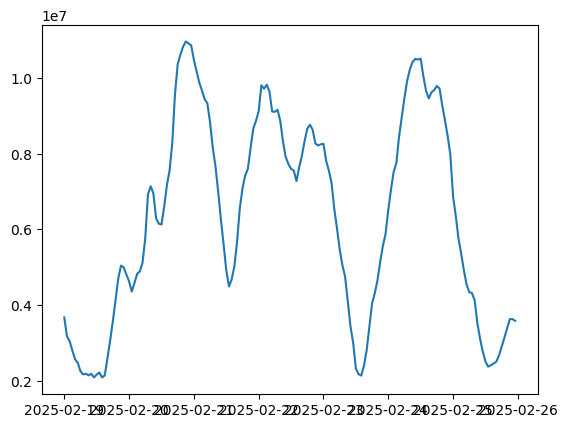

In [19]:
plt.plot(data['Period'], data['Avraknad (kWh)'], label='Avraknad (kWh)')
plt.show()

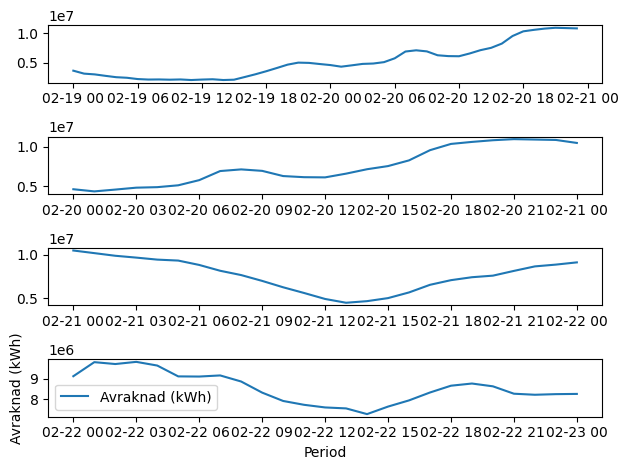

In [20]:
start_date = '2025-02-19 00:00:00'
end_date = '2025-02-20 23:00'

filtered_data1 = data[(data['Period'] >= start_date) & (data['Period'] <= end_date)]

fig, ax = plt.subplots(4,1)
#.figure(figsize=(10, 6))
ax[0].plot(filtered_data1['Period'], filtered_data1['Avraknad (kWh)'], label='Avraknad (kWh)')


start_date = '2025-02-20 00:00:00'
end_date = '2025-02-21 00:00:00'

filtered_data2 = data[(data['Period'] >= start_date) & (data['Period'] <= end_date)]

ax[1].plot(filtered_data2['Period'], filtered_data2['Avraknad (kWh)'], label='Avraknad (kWh)')

start_date = '2025-02-21 00:00:00'
end_date = '2025-02-22 00:00:00'

filtered_data3 = data[(data['Period'] >= start_date) & (data['Period'] <= end_date)]

ax[2].plot(filtered_data3['Period'], filtered_data3['Avraknad (kWh)'], label='Avraknad (kWh)')

start_date = '2025-02-22 00:00:00'
end_date = '2025-02-23 00:00:00'

filtered_data4 = data[(data['Period'] >= start_date) & (data['Period'] <= end_date)]

ax[3].plot(filtered_data4['Period'], filtered_data4['Avraknad (kWh)'], label='Avraknad (kWh)')

ax[3].set_xlabel('Period')
ax[3].set_ylabel('Avraknad (kWh)')
#fig.title('Electricity Price in Sweden')

plt.tight_layout()
plt.legend()
plt.show()

In [21]:
data_wind = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodWind010123-020225.csv", sep=';')
data_sol = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodSol010123-020225.csv", sep=';')
data_water = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodWater010123-020225.csv", sep=';')
data_nuc = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodNuc010123-020225.csv", sep=';')
data_other = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodOther010123-020225.csv", sep=';')
data_unspec = pd.read_csv("/Users/emmie/Desktop/CTMAT/V25/KEX/Data/2025-03-11ProductionMimer2y/prodUnspec010123-020225.csv", sep=';')

hour
0     5.014842e+06
1     4.941181e+06
2     4.884231e+06
3     4.838418e+06
4     4.790835e+06
5     4.700451e+06
6     4.563113e+06
7     4.416101e+06
8     4.303856e+06
9     4.239420e+06
10    4.190032e+06
11    4.190458e+06
12    4.194325e+06
13    4.222801e+06
14    4.300798e+06
15    4.429084e+06
16    4.558352e+06
17    4.672367e+06
18    4.778294e+06
19    4.905017e+06
20    5.051666e+06
21    5.145814e+06
22    5.123793e+06
23    5.083988e+06
Name: Avraknad (kWh), dtype: float64


/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_89788/1918979670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_wind['Period'] = pd.to_datetime(filtered_data_wind['Period'])
/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_89788/1918979670.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_wind['hour'] = filtered_data_wind.index.hour


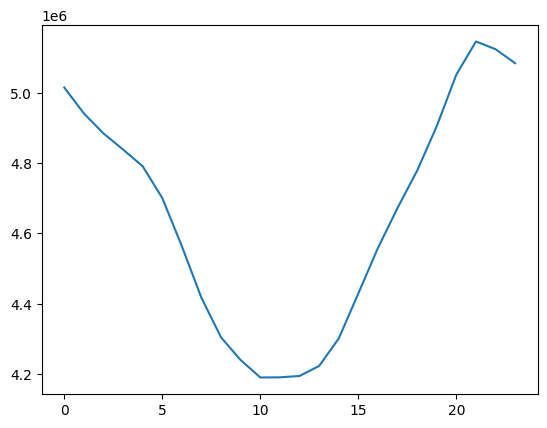

In [22]:
start_date = '2023-12-31 23:00:00'
end_date = '2025-01-01 00:00:00'

filtered_data_wind = data_wind[(data_wind['Period'] >= start_date) & (data_wind['Period'] <= end_date)]

# Convert time column to datetime format
filtered_data_wind['Period'] = pd.to_datetime(filtered_data_wind['Period'])

# Set time as index (optional, but useful)
filtered_data_wind.set_index('Period', inplace=True)

# Extract the hour from the timestamp
filtered_data_wind['hour'] = filtered_data_wind.index.hour

# Group by hour and sum the production for each hour across all weeks
hourly_mean = filtered_data_wind.groupby('hour')['Avraknad (kWh)'].mean()

# Display the result
print(hourly_mean)

fig, ax = plt.subplots(1,1)
ax.plot(filtered_data_wind['hour'][0:24], hourly_mean)

In [23]:
data_c = pd.DataFrame({
    'Period': data_wind['Period'],
    'Wind': data_wind['Avraknad (kWh)'],
    'Sol': data_sol['Avraknad (kWh)'],
    'Water': data_water['Avraknad (kWh)'],
    'Nuc': data_nuc['Avraknad (kWh)'],
    'Other': data_other['Avraknad (kWh)'],
    'Unspec': data_unspec['Avraknad (kWh)']
})

print(data_c.head())

             Period         Wind      Sol        Water        Nuc       Other  \
0  2023-01-01 00:00  6201230.652  384.135  2798958.371  5814290.0  575590.980   
1  2023-01-01 01:00  6204728.808  391.975  2522980.483  5815330.0  561569.012   
2  2023-01-01 02:00  5944498.283  392.677  2474343.001  5814820.0  565116.889   
3  2023-01-01 03:00  5834613.923  380.161  2379400.390  5814360.0  570927.029   
4  2023-01-01 04:00  5680433.785  379.466  2486042.171  5814090.0  572546.821   

     Unspec  
0  4465.465  
1  4117.789  
2  4594.982  
3  4725.134  
4  4940.635  


Wind hour
0     5.014842e+06
1     4.941181e+06
2     4.884231e+06
3     4.838418e+06
4     4.790835e+06
5     4.700451e+06
6     4.563113e+06
7     4.416101e+06
8     4.303856e+06
9     4.239420e+06
10    4.190032e+06
11    4.190458e+06
12    4.194325e+06
13    4.222801e+06
14    4.300798e+06
15    4.429084e+06
16    4.558352e+06
17    4.672367e+06
18    4.778294e+06
19    4.905017e+06
20    5.051666e+06
21    5.145814e+06
22    5.123793e+06
23    5.083988e+06
Name: Wind, dtype: float64
Sol hour
0       2176.561226
1       1446.510270
2       1424.531598
3       2111.889366
4       9905.968068
5      42783.299932
6     124312.789369
7     267328.035107
8     458106.114404
9     655936.935046
10    812845.955874
11    898049.180213
12    904680.795448
13    835841.462948
14    694013.073254
15    500142.947839
16    301543.911486
17    145755.125852
18     51148.918833
19     11730.928831
20      3343.841082
21      2252.447915
22      1857.440929
23      1771.963500
Name: Sol, dtype: 

/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_89788/1843007213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_c['Period'] = pd.to_datetime(filtered_data_c['Period'])
/var/folders/h8/4x9ydqms6k59rk527wyg0ctm0000gn/T/ipykernel_89788/1843007213.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_c['hour'] = filtered_data_c.index.hour


Text(0.5, 0, 'Hour of day')

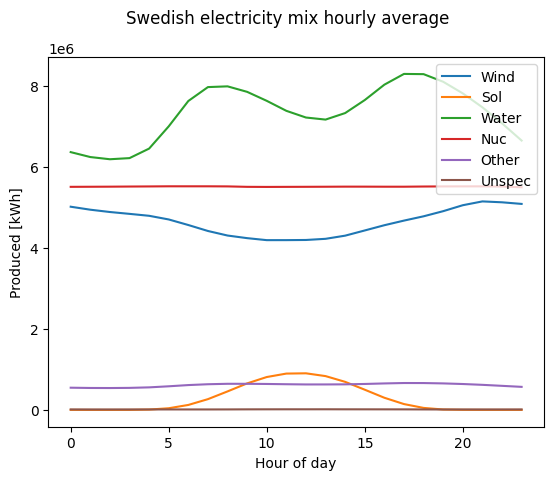

In [24]:
start_date = '2023-12-31 23:00:00'
end_date = '2025-01-01 00:00:00'

filtered_data_c = data_c[(data_c['Period'] >= start_date) & (data_c['Period'] <= end_date)]

# Convert time column to datetime format
filtered_data_c['Period'] = pd.to_datetime(filtered_data_c['Period'])

# Set time as index (optional, but useful)
filtered_data_c.set_index('Period', inplace=True)

# Extract the hour from the timestamp
filtered_data_c['hour'] = filtered_data_c.index.hour

# Group by hour and sum the production for each hour across all weeks
hourly_mean_wind = filtered_data_c.groupby('hour')['Wind'].mean()
hourly_mean_sol = filtered_data_c.groupby('hour')['Sol'].mean()
hourly_mean_water = filtered_data_c.groupby('hour')['Water'].mean()
hourly_mean_nuc = filtered_data_c.groupby('hour')['Nuc'].mean()
hourly_mean_other = filtered_data_c.groupby('hour')['Other'].mean()
hourly_mean_unspec = filtered_data_c.groupby('hour')['Unspec'].mean()
hourly_mean_total = (hourly_mean_wind + hourly_mean_sol + hourly_mean_water + hourly_mean_nuc + hourly_mean_other + hourly_mean_unspec)

# Display the result
print('Wind', hourly_mean_wind)
print('Sol', hourly_mean_sol)
print('Water', hourly_mean_water)
print('Nuc', hourly_mean_nuc)
print('Other', hourly_mean_other)
print('Unspec', hourly_mean_unspec)
print('Total', hourly_mean_total)

fig, ax = plt.subplots(1,1)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_wind)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_sol)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_water)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_nuc)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_other)
ax.plot(filtered_data_c['hour'][0:24], hourly_mean_unspec)
#ax.plot(filtered_data_c['hour'][0:24], hourly_mean_total)
ax.legend(['Wind','Sol','Water','Nuc','Other','Unspec','Total'])
fig.suptitle("Swedish electricity mix hourly average")
ax.set_ylabel("Produced [kWh]")
ax.set_xlabel("Hour of day")